In [2]:
import pandas as pd

# import numpy as np
import umap
import umap.plot
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Some plotting libraries
import matplotlib.pyplot as plt
from bokeh.plotting import show, save, output_notebook, output_file

%matplotlib inline
%load_ext nb_black
%load_ext lab_black

<IPython.core.display.Javascript object>

In [3]:
def join(iterator, seperator):
    """
    This function casts the elements of iterator to strings then merges those strings together with a string 
    representation of seperator.  
    Had to write a custom join to handle very, very long lists of things. "".join falls appart above 3013.
    params
    iterator: an iterator.  This function makes use of the overload + operator for strings
    seperator: an item of the same class as is contained in our iterator to be added between every pair of instances.
    returns
    The sum of the iterator values with seperator iterposed between each.
    """
    it = map(str, iterator)
    seperator = str(seperator)
    string = next(it, "")
    for s in it:
        string += seperator + s
    return string

<IPython.core.display.Javascript object>

In [4]:
reviews = pd.read_csv("reviews.csv")
reviews.shape

(1586614, 13)

<IPython.core.display.Javascript object>

In [5]:
reviews.head().T

,0,1,2,3,4
brewery_id,10325,10325,10325,10325,1075
brewery_name,Vecchio Birraio,Vecchio Birraio,Vecchio Birraio,Vecchio Birraio,Caldera Brewing Company
review_time,1234817823,1235915097,1235916604,1234725145,1293735206
review_overall,1.5,3,3,3,4
review_aroma,2,2.5,2.5,3,4.5
review_appearance,2.5,3,3,3.5,4
review_profilename,stcules,stcules,stcules,stcules,johnmichaelsen
beer_style,Hefeweizen,English Strong Ale,Foreign / Export Stout,German Pilsener,American Double / Imperial IPA
review_palate,1.5,3,3,2.5,4
review_taste,1.5,3,3,3,4.5


<IPython.core.display.Javascript object>

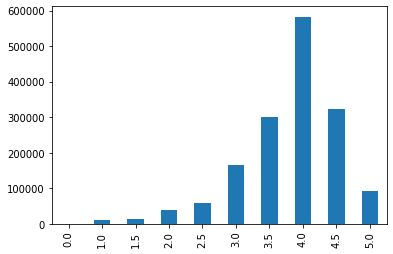

<IPython.core.display.Javascript object>

In [6]:
reviews.review_overall.value_counts().sort_index().plot.bar()

In [7]:
reviews = reviews[reviews.review_overall >= 4.5]
reviews.shape

(415705, 13)

<IPython.core.display.Javascript object>

In [8]:
%%time
unique_join = lambda x: join(x.unique(), " ")
beer = reviews.groupby('beer_beerid').agg({
    'beer_name':'first',
    'brewery_name':'first',
    'beer_style':'first',
    'beer_abv':'mean',
    'review_aroma':'mean',
    'review_appearance':'mean',
    'review_overall':'mean',
    'review_palate':'mean',
    'review_taste':'mean',
    'review_profilename':[unique_join, len]
}).reset_index()

beer.columns = """beer_beerid beer_name brewery_name beer_style beer_abv 
review_aroma review_appearance review_overall review_palate review_taste 
review_profilename_list review_profilename_len""".split()
beer.shape

CPU times: user 2.25 s, sys: 46.4 ms, total: 2.29 s
Wall time: 2.31 s


(29484, 12)

<IPython.core.display.Javascript object>

In [9]:
beer.head().T

,0,1,2,3,4
beer_beerid,3,4,5,6,7
beer_name,Cactus Queen IPA,Wildcatter's Crude Stout,Amber,Turbodog,Purple Haze
brewery_name,Yellow Rose Brewing Company,Yellow Rose Brewing Company,Abita Brewing Co.,Abita Brewing Co.,Abita Brewing Co.
beer_style,American IPA,American Stout,Vienna Lager,English Brown Ale,Fruit / Vegetable Beer
beer_abv,NaN,NaN,4.5,5.6,4.2
review_aroma,4.5,4.25,3.50893,3.84,3.65094
review_appearance,4,4.5,3.79464,3.984,3.66038
review_overall,4.5,4.75,4.5625,4.6,4.66038
review_palate,4,4.5,3.80357,3.864,3.74528
review_taste,4.5,4.5,3.91964,4.1,3.88679


<IPython.core.display.Javascript object>

In [10]:
popular_beer = beer[beer.review_profilename_len > 50].reset_index(drop=True)
popular_beer.shape

(1540, 12)

<IPython.core.display.Javascript object>

In [11]:
beer_by_authors_vectorizer = CountVectorizer(binary=True, min_df=10)
beer_by_authors = beer_by_authors_vectorizer.fit_transform(
    popular_beer.review_profilename_list
)
beer_by_authors.shape

(1540, 5030)

<IPython.core.display.Javascript object>

In [12]:
beer_by_authors_model = umap.UMAP(
    n_neighbors=15, n_components=2, metric="jaccard", unique=True
).fit(beer_by_authors.todense())

<IPython.core.display.Javascript object>

In [15]:
# abv_label = popular_beer.beer_abv.fillna(0)
hover_df = popular_beer["beer_beerid beer_name brewery_name beer_style".split()]
f = umap.plot.interactive(
    beer_by_authors_model,
    labels=popular_beer.brewery_name,
    hover_data=hover_df,
    theme="fire",
    point_size=5,
)
# save(f,'results/popular_beer_by_positive_reviewers_jaccard.html')
show(f)

<IPython.core.display.Javascript object>

In [16]:
beer_by_authors_model.graph_.shape

(1540, 1540)

<IPython.core.display.Javascript object>